# This is a script that runs binary logistic regression from scratch


## Firstly the necessary libraries are imported

In [97]:
import numpy as np
import pandas as pd
import math


## For the data set, the iris flower data set is used

The dataset goes through the following processing for logistic regression
* Keep only rows that have "Setosa" and "Virginica"
* Encode Setosa to 0 and Virginica to 1


In [107]:
## Getting data

iris = pd.read_csv('data/iris.csv')

iris = iris.drop(['Unnamed: 0'],axis=1) 

iris_filtered = iris[iris['Species'].isin(['setosa','virginica'])]

iris_filtered.loc[iris_filtered['Species'] =='setosa', 'Species'] = 0

iris_filtered.loc[iris_filtered['Species'] =='virginica', 'Species'] = 1

iris_filtered





/Users/padhokshaja/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Convert data to numpy array objects

* As the data set would go through mathematical operations , it would be better to convert them to numpy objects. The independent data, which is used for modeling, is normalized, thus ensuring converge of gradient descent.



In [109]:
## Create Matrices to Input into the Model.

X = iris_filtered[['SepalLength','SepalWidth','PetalWidth','PetalWidth']]
X = np.asarray(X)
## Normalize the matrice

mean = X.mean(0)

std = X.std(0)

X = (X-mean)/std


column_of_ones = np.ones((X.shape[0],1))
X= np.append(column_of_ones,X,axis=1)



y = iris_filtered[['Species']]

y = np.asarray(y)

print(y.shape)

print(X.shape)




(100, 1)
(100, 5)


## Calculating the sigmoid, Cost Function


To map real values to the interval [0,1], its essential to use a mapping function. One such such function, that is used popularly for this is called the sigmoid function. For values that are close to INF, the sigmoid function maps that to 1 and the values that are close to -INF, the function maps those to 0.


Its essential that we calculate the cost associated with the estimation. For binary classification, the binary cross entropy function is used. This function penalizes the model if a wrong prediction is made. The job of the classifier is to find model coefficients that minimize this cost function.

In [100]:
## Create sigmoid function to map from real values to [0,1]


theta = np.zeros((X.shape[1],1))

print(theta.shape)
# Number of Gradient Descent Iterations
num_iter = 1500
# learning rate
learning_rate =0.01

# denominator term 
m = X.shape[0]

print(m)






def sigmoid(x):
    sigmoid_value = 1/(1+np.exp(-x))
    return(sigmoid_value)


(5, 1)
100


In [101]:
def cost_func(theta,X,y):
    
    m = X.shape[0]
    
    h = X.dot(theta)
    
    h = np.array(h,dtype=np.float32)
    
    h = sigmoid(h)
    
    y_t = y.transpose()
    
    cost = -y_t.dot(np.log(h))-(1-y_t).dot(np.log(1-h))
    
    cost = cost *(1/(2*m))
    
    return(cost)
    

## Initialize theta and run gradient descent

The theta (model coefficient) is initialized. The learning rate is set to 0.01. The gradient descent technique is used to find theta that minimizes the cost function. The iterations steps and the cost for each iteration is recorded. As seen in the below line graph, the cost reduces with each iteration.

In [110]:
iter = 15000

learning_rate = 0.01


cost_df = []



for i in range(iter):
    h = X.dot(theta)
    h = np.array(h,dtype=np.float32)
    h = sigmoid(h)
    theta = theta - (learning_rate/m)*(X.transpose()).dot((h-y))
    
    
    
    cost = cost_func(theta,X,y)
    cost_df.append([i,cost])
    
    
    




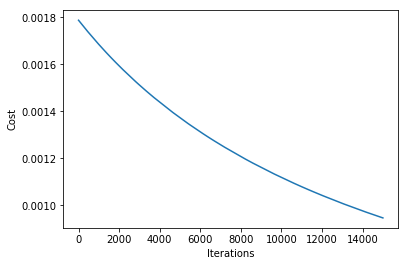

In [111]:
import matplotlib.pyplot as plt
cost_df = np.asarray(cost_df)
plt.plot(cost_df[:,0],cost_df[:,1])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()



In [104]:
y_hat = np.array(X.dot(theta),dtype=np.float32)
y_hat = sigmoid(y_hat)
y_hat_refined = [1 if i > 0.5 else 0 for i in y_hat]


In [105]:
y_hat_refined = np.reshape(np.asarray(y_hat_refined),(100,1))

In [106]:
(y_hat_refined==y).sum()

100